In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale
img = cv2.imread("input.jpg", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Image not found!")
    exit()

In [3]:
bit_planes = []

for k in range(8):
    bit_plane = (img >> k) & 1
    bit_planes.append(bit_plane)

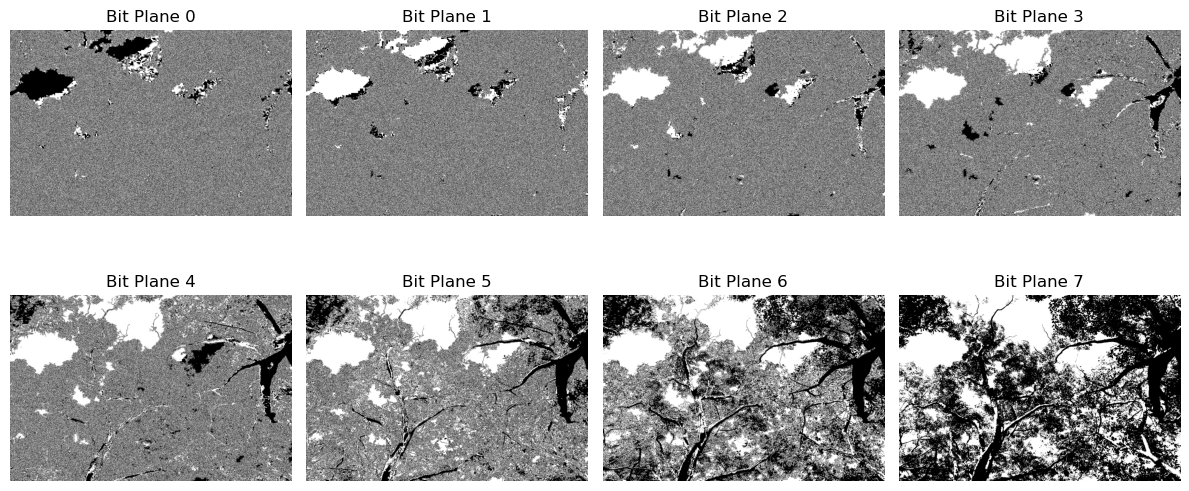

In [4]:
plt.figure(figsize=(12,6))

for k in range(8):
    plt.subplot(2,4,k+1)
    plt.imshow(bit_planes[k], cmap='gray')
    plt.title(f'Bit Plane {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()

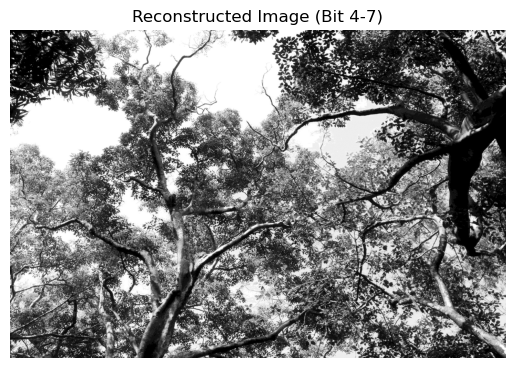

In [5]:
reconstructed = np.zeros_like(img)

for k in range(4,8):
    reconstructed += (bit_planes[k] << k)

plt.imshow(reconstructed, cmap='gray')
plt.title("Reconstructed Image (Bit 4-7)")
plt.axis('off')
plt.show()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read color image
img = cv2.imread("input.jpg")

if img is None:
    print("Image not found!")
    exit()

# Convert BGR to RGB (since OpenCV reads as BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [2]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

In [3]:
bit_planes_R = []

for k in range(8):
    bit_plane = (R >> k) & 1
    bit_planes_R.append(bit_plane)

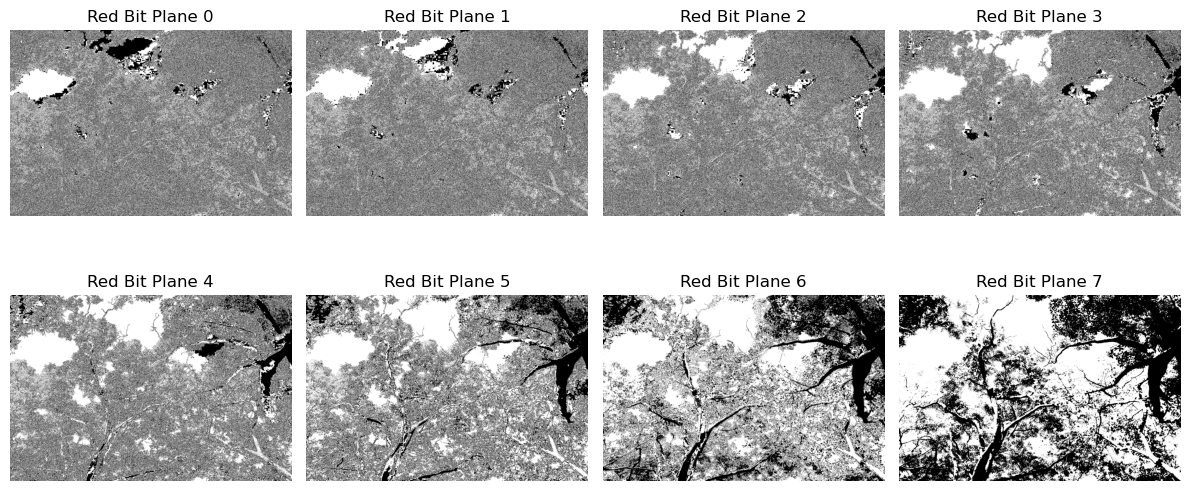

In [4]:
plt.figure(figsize=(12,6))

for k in range(8):
    plt.subplot(2,4,k+1)
    plt.imshow(bit_planes_R[k], cmap='gray')
    plt.title(f'Red Bit Plane {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()

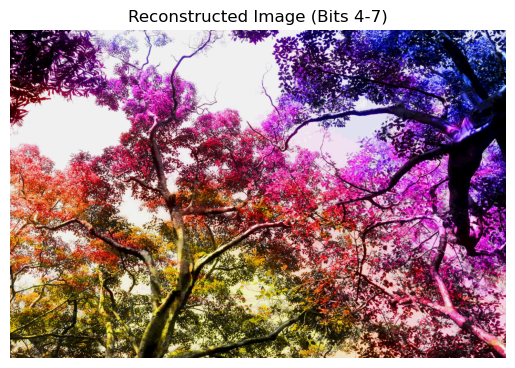

In [6]:
reconstructed = np.zeros_like(img)

for c in range(3):
    for k in range(4,8):
        bit_plane = (img[:,:,c] >> k) & 1
        reconstructed[:,:,c] += (bit_plane << k)

plt.imshow(reconstructed)
plt.title("Reconstructed Image (Bits 4-7)")
plt.axis('off')
plt.show()